# üéØ An√°lisis del Rendimiento Acad√©mico

In [1]:
# Se importan las librerias necesarias

import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr

In [2]:
# Se realiza la conexi√≥n con la base de datos

conn2 = ps.connect(
    dbname = 'Student_Performance',
    user = 'postgres',
    password = '1004669815',
    host = 'localhost',
    port = '5432'
)

In [ ]:
# Se importa la tabla y se transforma en un data frame de pandas

sql = """SELECT *
FROM public.students"""

df = sqlio.read_sql_query(sql, conn2)

In [4]:
# Se verifica que la conexi√≥n se halla realizado correctamente
print(df.head())

  student_id first_name last_name                    email  gender  age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1002      Ahmed     Jones  student2@university.com    Male   24   
2      S1003       Omar  Williams  student3@university.com  Female   24   
3      S1004       John     Smith  student4@university.com  Female   23   
4      S1001      Maria     Brown  student1@university.com    Male   18   

    department  attendance  midterm_score  final_score  ...  projects_score  \
0  Engineering       52.29          55.03        57.82  ...           85.90   
1     Business       57.19          67.05        93.68  ...           73.79   
2  Mathematics       95.15          47.79        80.63  ...           92.12   
3           CS       54.18          46.59        78.89  ...           68.42   
4  Engineering       97.27          97.23        45.80  ...           55.65   

   total_score  grade  study_hours  extracurricular_activities  \
0       

## üîç Exploraci√≥n del dataset

In [5]:
print("Forma: ", df.shape, '\n')

print("Columnas: ", df.columns, '\n')

print("Tipos de Columnas:", '\n', df.dtypes)

Forma:  (5000, 23) 

Columnas:  Index(['student_id', 'first_name', 'last_name', 'email', 'gender', 'age',
       'department', 'attendance', 'midterm_score', 'final_score',
       'assignments_avg', 'quizzes_avg', 'participation_score',
       'projects_score', 'total_score', 'grade', 'study_hours',
       'extracurricular_activities', 'internet_access', 'parent_education',
       'family_income', 'stress_level', 'sleep_hours'],
      dtype='object') 

Tipos de Columnas: 
 student_id                     object
first_name                     object
last_name                      object
email                          object
gender                         object
age                             int64
department                     object
attendance                    float64
midterm_score                 float64
final_score                   float64
assignments_avg               float64
quizzes_avg                   float64
participation_score           float64
projects_score              

In [6]:
# Revisando valores nulos

print(df.isnull().sum())

# Originalmente existian 516 valores nulos en la columna attendance, 517 en assigments_avg, y 1794 en parent education.
# Sin embargo en el an√°lisis realizado en SQL se llenaron dichos valores nulos, por lo que ahora no existen en este ejercicio.

student_id                    0
first_name                    0
last_name                     0
email                         0
gender                        0
age                           0
department                    0
attendance                    0
midterm_score                 0
final_score                   0
assignments_avg               0
quizzes_avg                   0
participation_score           0
projects_score                0
total_score                   0
grade                         0
study_hours                   0
extracurricular_activities    0
internet_access               0
parent_education              0
family_income                 0
stress_level                  0
sleep_hours                   0
dtype: int64


In [7]:
print(df.describe())

               age   attendance  midterm_score  final_score  assignments_avg  \
count  5000.000000  5000.000000    5000.000000  5000.000000      5000.000000   
mean     21.048400    75.432560      70.326844    69.640788        74.802523   
std       1.989786    13.611514      17.213209    17.238744        13.647218   
min      18.000000    50.010000      40.000000    40.000000        50.000000   
25%      19.000000    64.737500      55.457500    54.667500        63.687500   
50%      21.000000    75.361619      70.510000    69.735000        75.121648   
75%      23.000000    86.182500      84.970000    84.500000        85.570000   
max      24.000000   100.000000      99.980000    99.980000        99.980000   

       quizzes_avg  participation_score  projects_score  total_score  \
count  5000.000000          5000.000000     5000.000000  5000.000000   
mean     74.910728             4.980024       74.924860    75.121804   
std      14.504281             2.890136       14.423415    14.3

## üìä An√°lisis Gr√°fico

### üìä Datos generales y comparativos

- Histograma de la edad de los estudiantes.
- Gr√°fico de dispersi√≥n de midterm_score vs final_score para analizar progresi√≥n.

### üéì Rendimiento Acad√©mico

- Comparaci√≥n del total_score por g√©nero.
- Distribuci√≥n del total_score seg√∫n nivel educativo de los padres.
- Calificaciones promedio por tipo de ingreso familiar.
- Dispersi√≥n entre attendance y total_score.
- Proporci√≥n de estudiantes con calificaciones altas (A/B) por departamento.

### üß† H√°bitos de estudio y estilo de vida

- Heatmap de correlaciones entre h√°bitos de estudio (study_hours, sleep_hours, extracurricular_activities, etc.).
- Relaci√≥n entre study_hours y stress_level.
- Distribuci√≥n de horas de sue√±o entre estudiantes con y sin actividades extracurriculares.
- Boxplot de sleep_hours por grado acad√©mico.
- Comparaci√≥n de study_hours por g√©nero.

### üíº Factores familiares y contexto

- Comparaci√≥n del stress_level seg√∫n parent_education.
- Relaci√≥n entre income level y total_score.
- Tasa de asistencia por grupo familiar.



In [8]:
# Asignar cada columna del DataFrame a una variable con su mismo nombre, para mejorar legibilidad
for col in df.columns:
    globals()[col] = df[col]
    print(col)


student_id
first_name
last_name
email
gender
age
department
attendance
midterm_score
final_score
assignments_avg
quizzes_avg
participation_score
projects_score
total_score
grade
study_hours
extracurricular_activities
internet_access
parent_education
family_income
stress_level
sleep_hours


### üìä Datos generales y comparativos

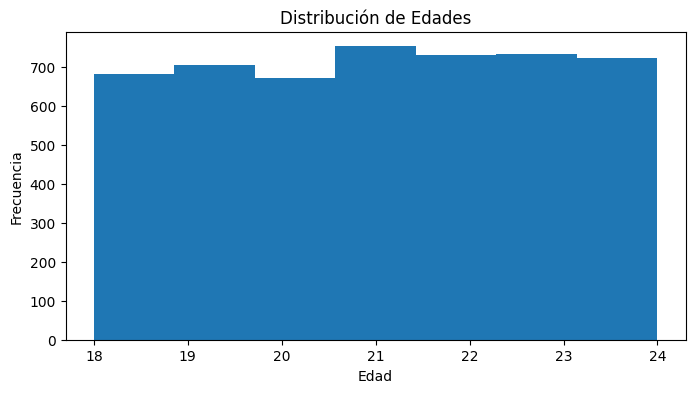

<Figure size 640x480 with 0 Axes>

In [9]:
# Definiendo el tama√±o de la imagen
plt.figure(figsize=(8,4))

# Histograma
plt.hist(age, bins=7)

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de Edades')
plt.show()
plt.clf()

Viendo este gr√°fico, se puede ver que en este conjunto de datos, no hay una edad predominante entre 18 y 24 a√±os, sino que la distribuci√≥n es consistente.

---

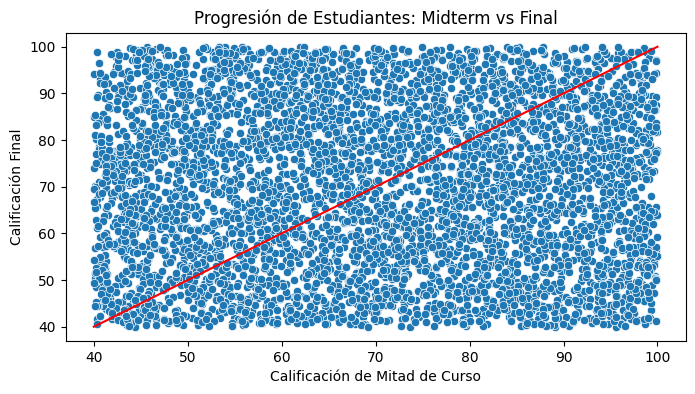

<Figure size 640x480 with 0 Axes>

In [10]:
# Definiendo las variables para mejorar la legibilidad
x = [40, 50, 60, 70, 80, 90, 100]
y = x

# Definiendo el tama√±o de la imagen
plt.figure(figsize=(8,4))

# Scatter plot para comparar las calificaciones a mitad de curso vs las calificaciones finales
sns.scatterplot(x = midterm_score, y = final_score)

# Linea que determina su el estudiante tuvo un avance o retroceso en sus calificaciones.
plt.plot(x, y, color='r')

plt.xlabel('Calificaci√≥n de Mitad de Curso')
plt.ylabel('Calificaci√≥n Final')
plt.title('Progresi√≥n de Estudiantes: Midterm vs Final')
plt.show()
plt.clf()

Los puntos sobre la linea roja son los estudiantes cuyas calificaciones al final del curso fueron mejores que en la mitad de √©l.
Al contratio, aquellos puntos bajo la linea roja son los estudiantes que empeoraron sus calificaciones.

---

### üéì Rendimiento Acad√©mico

gender
Female    75.265762
Male      74.983603
Name: total_score, dtype: float64


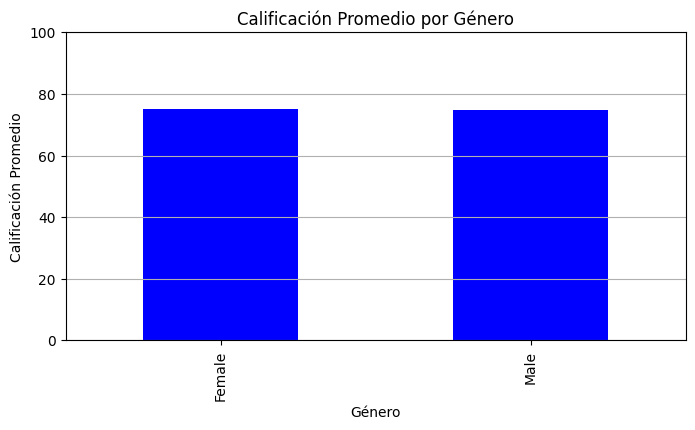

<Figure size 640x480 with 0 Axes>

In [11]:
# Se agrupa por g√©nero y se calcula el total score promedio
total_score_by_genre = df.groupby('gender', observed=True)['total_score'].mean().sort_index()
print(total_score_by_genre)

# Gr√°fica de la asistencia promedio
plt.figure(figsize=(8,4))
total_score_by_genre.plot(kind='bar', color='blue')
plt.title("Calificaci√≥n Promedio por G√©nero")
plt.xlabel("G√©nero")
plt.ylabel("Calificaci√≥n Promedio")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()
plt.clf()

Ambas barras tienen valores muy similares, con un promedio cercano a 70. Esto sugiere que no hay una diferencia significativa entre los g√©neros en este conjunto de datos. Esto podr√≠a indicar que, en este contexto particular, tanto hombres como mujeres tienen desempe√±os acad√©micos similares.


---

                  count       mean        std    min      25%     50%  \
parent_education                                                        
Bachelor's        810.0  75.361790  14.472535  50.07  62.4050  76.200   
High School       796.0  74.905955  14.447138  50.03  62.7525  75.030   
Master's          780.0  74.732269  14.339328  50.05  62.8850  74.425   
None              810.0  75.000296  14.599217  50.03  62.1675  75.025   
PhD               820.0  75.398439  14.382244  50.09  63.1375  75.610   
Unknown           984.0  75.277134  14.224282  50.02  63.0400  75.875   

                      75%    max  
parent_education                  
Bachelor's        88.1275  99.91  
High School       87.1775  99.99  
Master's          87.0600  99.76  
None              87.7175  99.94  
PhD               87.9150  99.99  
Unknown           87.4125  99.98  


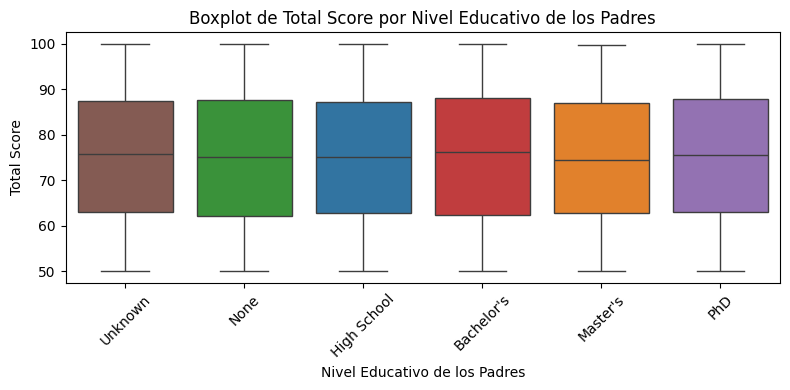

<Figure size 640x480 with 0 Axes>

In [12]:
summary = df.groupby('parent_education', observed=False)['total_score'].describe()
print(summary)

orden = ['Unknown', 'None', 'High School', 'Bachelor\'s', 'Master\'s', 'PhD']

plt.figure(figsize=(8,4))
sns.boxplot(x=parent_education, y=total_score, hue=parent_education, order=orden)
plt.title("Boxplot de Total Score por Nivel Educativo de los Padres")
plt.xlabel("Nivel Educativo de los Padres")
plt.ylabel("Total Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()


Se observan pocas diferencias entre las medias y la dipersi√≥n en todos los niveles educativos de los padres y el total score de sus hijos. Lo que sugiere una baja influencia del nivel educativo de los padres sobre las calificaciones de sus hijos.

---

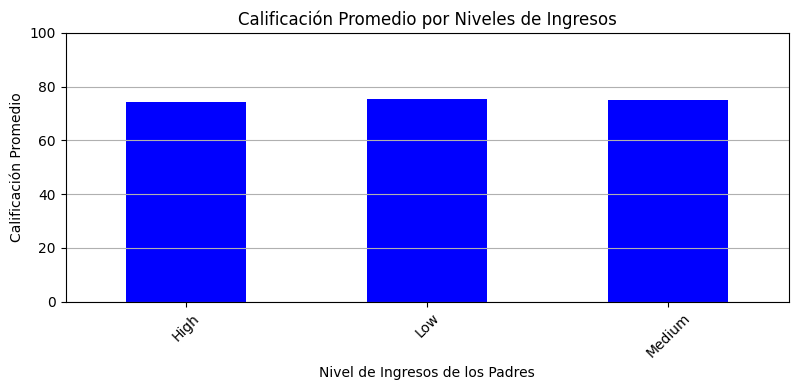

<Figure size 640x480 with 0 Axes>

In [13]:
mean_score_by_income = df.groupby('family_income', observed=False)['total_score'].mean()

plt.figure(figsize=(8,4))
mean_score_by_income.plot(kind='bar', color='blue')
plt.title("Calificaci√≥n Promedio por Niveles de Ingresos")
plt.xlabel("Nivel de Ingresos de los Padres")
plt.ylabel("Calificaci√≥n Promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y')
plt.ylim(0,100)
plt.show()
plt.clf()

Las barras correspondientes a cada nivel de ingresos est√°n alrededor del valor promedio de 70, sin diferencias significativas entre ellas. Esto sugiere que, en este conjunto de datos, el nivel de ingresos de los padres no parece influir de manera notable en las calificaciones promedio de los estudiantes.


---

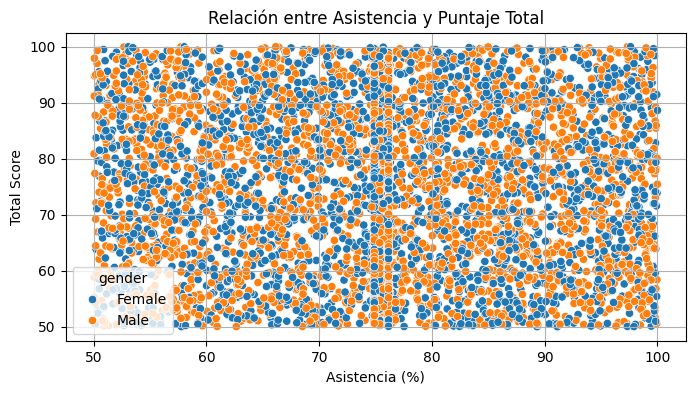

Correlaci√≥n: -0.02, p-valor: 0.1927


In [14]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='attendance', y='total_score', hue='gender')
plt.title('Relaci√≥n entre Asistencia y Puntaje Total')
plt.xlabel('Asistencia (%)')
plt.ylabel('Total Score')
plt.grid(True)
plt.show()

corr, p_val = pearsonr(df['attendance'], df['total_score'])
print(f"Correlaci√≥n: {corr:.2f}, p-valor: {p_val:.4f}")

Un coeficiente de -0.02 indica una correlaci√≥n casi nula entre attendance y total_score. Es decir, no parece haber una relaci√≥n lineal fuerte entre estas dos variables.

El p-valor de 0.1927 es mayor que 0.05, lo que sugiere que esta relaci√≥n no es estad√≠sticamente significativa. En otras palabras, la variaci√≥n en asistencia no explica significativamente la variaci√≥n en el puntaje total, al menos de forma lineal.

Lo anterior se ve apoyado con el gr√°fico, en el cual se observa una dispersi√≥n uniforme por toda la gr√°fica sin seguir ninguna tendencia clara. Adem√°s, los puntos de color azul (Female) y naranja (Male) est√°n distribuidos de manera similar, lo que podr√≠a indicar que no hay grandes diferencias en esta relaci√≥n dependiendo del g√©nero.

---

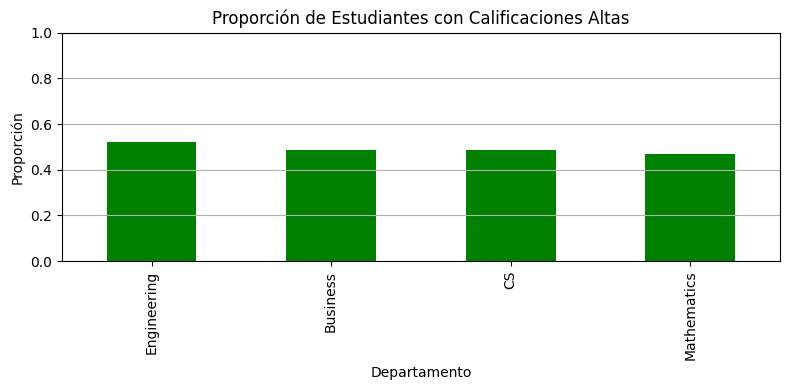

In [15]:
# Filtro los estudiantes con calificaci√≥n A o B
high_grades = df[df['grade'].isin(['A', 'B'])]

# Conteo de estudiantes con A o B por departamento
count_high = high_grades.groupby('department')['grade'].count()

# Total de estudiantes por departamento
total_by_dept = df.groupby('department')['grade'].count()

# Calculo de la proporci√≥n
proportion = (count_high / total_by_dept).sort_values(ascending=False)

plt.figure(figsize=(8,4))
proportion.plot(kind='bar', color='green')
plt.title('Proporci√≥n de Estudiantes con Calificaciones Altas')
plt.ylabel('Proporci√≥n')
plt.xlabel('Departamento')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Este grafico sugiere que, en este contexto, no hay un departamento que destaque significativamente sobre los dem√°s en t√©rminos de tener m√°s estudiantes con calificaciones altas. Podr√≠a interpretarse como una se√±al de equidad en el rendimiento acad√©mico entre departamentos, o podr√≠a sugerir que las condiciones o est√°ndares de evaluaci√≥n son consistentes entre ellos.

---

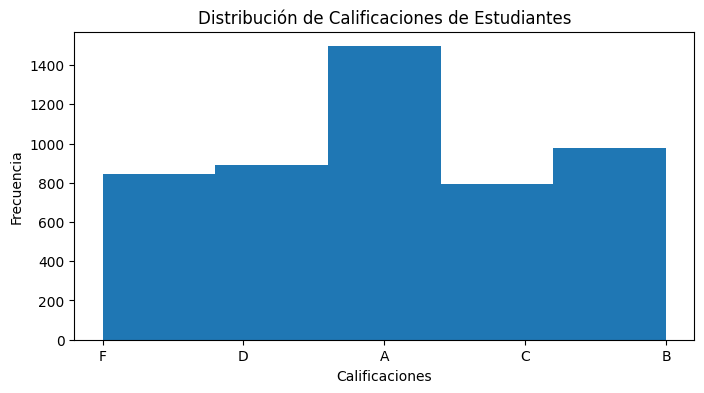

<Figure size 640x480 with 0 Axes>

In [16]:
# Definiendo el tama√±o de la imagen
plt.figure(figsize=(8,4))

# Histograma
plt.hist(grade, bins=5)

plt.title("Distribuci√≥n de Calificaciones de Estudiantes")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
plt.show()
plt.clf()

En cuanto a las frecuencias, la calificaci√≥n A es la m√°s frecuente, alcanzando alrededor de 1400 estudiantes. Le siguen las calificaciones C (aproximadamente 900) y D (850). Las calificaciones F y B tienen frecuencias similares, alrededor de 800 cada una.

Se puede notar que las calificaciones m√°s altas (A) tienen la mayor frecuencia, lo cual podr√≠a indicar un rendimiento acad√©mico mayoritario positivo. Sin embargo, las calificaciones bajas (F) tambi√©n est√°n presentes de forma significativa, lo que sugiere una cierta polarizaci√≥n en el desempe√±o.

Este gr√°fico podr√≠a indicar que, aunque hay muchos estudiantes que sobresalen, tambi√©n hay un grupo considerable que necesita apoyo adicional para mejorar su rendimiento.

---

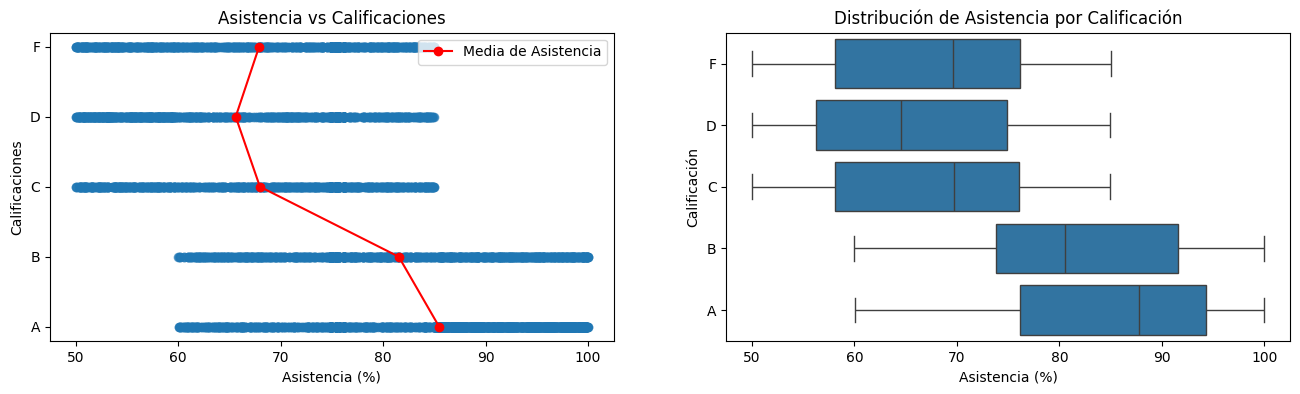

<Figure size 640x480 with 0 Axes>

In [28]:
# Calcular media de asistencia por calificaci√≥n
df_grouped = df.groupby('grade')['attendance'].mean()

# Tama√±o de imagen
plt.figure(figsize=(16,4))

# Scatter plot + l√≠nea de medias
plt.subplot(1,2,1)
plt.plot(df_grouped.values, df_grouped.index, marker='o', color='r', label='Media de Asistencia')
plt.scatter(x=attendance, y=grade, alpha=0.6)

plt.title("Asistencia vs Calificaciones")
plt.xlabel("Asistencia (%)")
plt.ylabel("Calificaciones")
plt.legend()

# Orden deseado para el boxplot
grade_order = ['F', 'D', 'C', 'B', 'A']

# Box plot
plt.subplot(1,2,2)
sns.boxplot(x=attendance, y=grade, order=grade_order)
plt.title("Distribuci√≥n de Asistencia por Calificaci√≥n")
plt.xlabel("Asistencia (%)")
plt.ylabel("Calificaci√≥n")

plt.show()
plt.clf()


"Asistencia vs Calificaciones":
La "Media de Asistencia" (l√≠nea roja) parece indicar que, en promedio, los estudiantes con mayores calificaciones (A y B) tienden a tener una asistencia m√°s alta, mientras que los estudiantes con calificaciones m√°s bajas (F y D) muestran menor asistencia. Aunque hay puntos dispersos, parece que existe una relaci√≥n general positiva entre la asistencia y las calificaciones. Es decir, mayor asistencia podr√≠a estar vinculada a mejores resultados acad√©micos.

"Distribuci√≥n de Asistencia por Calificaci√≥n":
Los estudiantes con calificaci√≥n A tienen una mediana de asistencia alta y un rango m√°s estrecho, lo que sugiere mayor consistencia en la asistencia entre los mejores alumnos. Por otro lado, las calificaciones F tienen una mediana m√°s baja y rangos m√°s amplios, indicando variabilidad en los porcentajes de asistencia en este grupo. Esto refuerza la idea de que la asistencia frecuente podr√≠a ser un factor positivo para obtener mejores calificaciones.

En conclusi√≥n, estos gr√°ficos parecen mostrar una relaci√≥n entre la asistencia y el rendimiento acad√©mico, donde asistir m√°s regularmente podr√≠a ser clave para alcanzar mejores resultados.

---

### üß† H√°bitos de estudio y estilo de vida

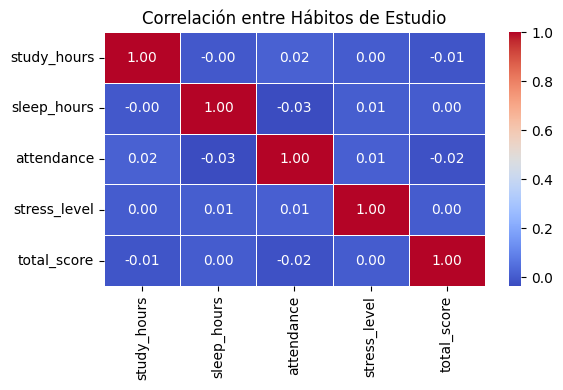

<Figure size 640x480 with 0 Axes>

In [34]:
# Seleccionar solo columnas de h√°bitos de estudio
habits = df[['study_hours', 'sleep_hours', 'attendance', 'stress_level', 'total_score']]

# Calcular la matriz de correlaci√≥n
correlation_matrix = habits.corr()

# Crear el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlaci√≥n entre H√°bitos de Estudio')
plt.tight_layout()
plt.show()
plt.clf()

Seg√∫n esta gr√°fica, factores como las horas de estudio o el nivel de estr√©s no tienen un impacto claro en el puntaje total, ya que los coeficientes de correlaci√≥n oscilan entre -0.03 y 0.02, lo que indica que ninguna de las variables tiene una relaci√≥n fuerte con otra. En particular, el puntaje total (total_score) no muestra una conexi√≥n significativa con el tiempo de estudio, la asistencia o el nivel de estr√©s.

El heatmap no muestra correlaciones significativas entre los h√°bitos de estudio y el rendimiento acad√©mico, lo que sugiere que otros factores podr√≠an influir m√°s en el desempe√±o.

---

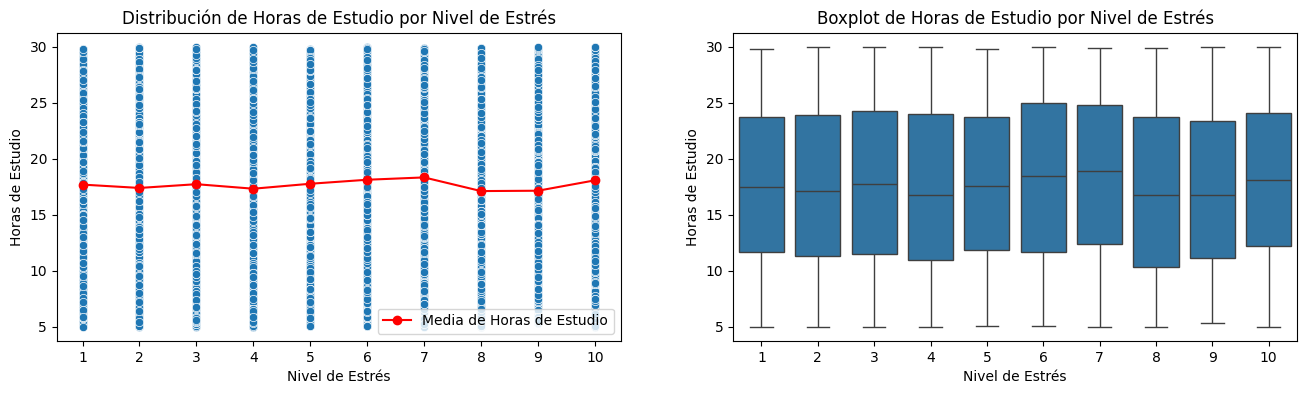

<Figure size 640x480 with 0 Axes>

In [19]:
df_grouped = df.groupby('stress_level')['study_hours'].mean()

# Definiendo el tama√±o de la imagen
plt.figure(figsize=(16,4))

# Scatter plot + linea de medias
plt.subplot(1,2,1)
sns.scatterplot(x = stress_level, y = study_hours)
plt.plot(df_grouped.index, df_grouped.values, marker='o', color='r', label='Media de Horas de Estudio')

plt.xticks(range(1,11))
plt.xlabel('Nivel de Estr√©s')
plt.ylabel('Horas de Estudio')
plt.title('Distribuci√≥n de Horas de Estudio por Nivel de Estr√©s')
plt.legend()

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=stress_level, y=study_hours)
plt.title("Boxplot de Horas de Estudio por Nivel de Estr√©s")
plt.xlabel("Nivel de Estr√©s")
plt.ylabel("Horas de Estudio")

plt.show()
plt.clf()

Gr√°fico de dispersi√≥n:
Los puntos est√°n dispersos, indicando que no todos los estudiantes responden al estr√©s de la misma manera; algunos estudian m√°s, otros menos. La l√≠nea roja muestra que las horas promedio de estudio tienden a aumentar ligeramente con los niveles de estr√©s m√°s altos, especialmente en niveles entre 6 y 7. Esto podr√≠a sugerir que el estr√©s puede estar vinculado a una mayor dedicaci√≥n a los estudios.

Boxplot:
En los niveles de estr√©s m√°s bajos (1 a 3), las medianas de las horas de estudio son menores comparadas con algunos de los niveles de estr√©s m√°s altos. Esto refuerza la idea de que los estudiantes con mayor estr√©s tienden a estudiar m√°s.

Estos gr√°ficos sugieren que el estr√©s podr√≠a influir en los h√°bitos de estudio, con una tendencia a que los estudiantes m√°s estresados dediquen m√°s tiempo al estudio. Sin embargo, esta relaci√≥n no es uniforme, ya que hay gran variabilidad en cada nivel.

---

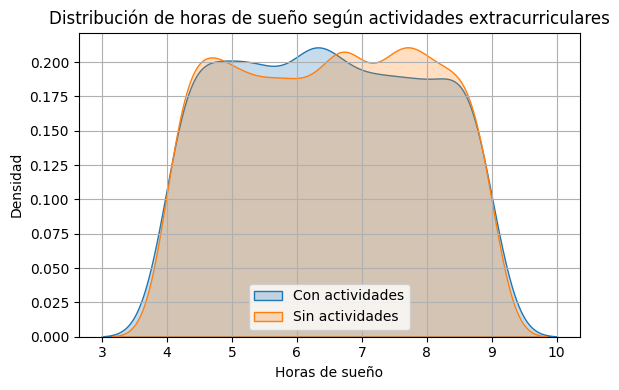

<Figure size 640x480 with 0 Axes>

In [33]:
# Gr√°fico de densidad
plt.figure(figsize=(6,4))
sns.kdeplot(data=df[df['extracurricular_activities'] == True], x='sleep_hours', label='Con actividades', fill=True)
sns.kdeplot(data=df[df['extracurricular_activities'] == False], x='sleep_hours', label='Sin actividades', fill=True)

plt.title('Distribuci√≥n de horas de sue√±o seg√∫n actividades extracurriculares')
plt.xlabel('Horas de sue√±o')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.clf()



Ambas curvas de densidad, la azul ("Con actividades") y la naranja ("Sin actividades"), tienen distribuciones bastante similares. Ambas alcanzan sus picos entre las 5 y 9 horas de sue√±o, lo que indica que la mayor√≠a de las personas, independientemente de si tienen actividades extracurriculares o no, tienden a dormir dentro de este rango.

La curva naranja ("Sin actividades") parece tener una ligera mayor densidad alrededor de las 7-8 horas, lo que podr√≠a indicar que quienes no participan en actividades tienden ligeramente a concentrarse m√°s en ese rango.

En general, el hecho de participar o no en actividades extracurriculares parece no generar diferencias significativas en las horas promedio de sue√±o.

---

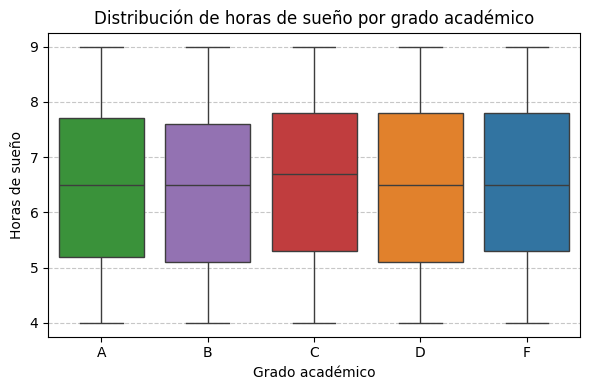

<Figure size 640x480 with 0 Axes>

In [32]:
orden = ['A', 'B', 'C', 'D', 'F']

plt.figure(figsize=(6, 4))
sns.boxplot(x=grade, y=sleep_hours, order=orden, hue=grade)

plt.title('Distribuci√≥n de horas de sue√±o por grado acad√©mico')
plt.xlabel('Grado acad√©mico')
plt.ylabel('Horas de sue√±o')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.clf()


Las medianas de horas de sue√±o son bastante similares para todos los grados. La variaci√≥n en las horas de sue√±o tambi√©n es muy parecida, sin diferencias muy marcadas entre los grupos.

Es posible que no haya una relaci√≥n clara entre el grado acad√©mico y la cantidad de sue√±o solo observando este gr√°fico.

---

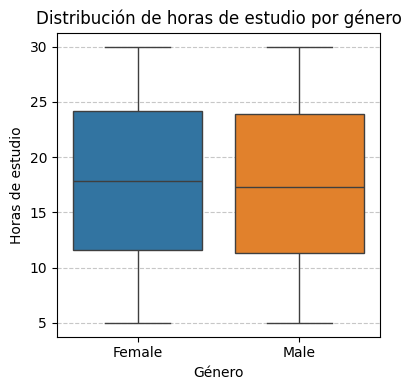

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize=(4, 4))
sns.boxplot(x=gender, y=study_hours, hue=gender)

plt.title('Distribuci√≥n de horas de estudio por g√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Horas de estudio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.clf()


Ambos g√©neros tienen casi la misma mediana de horas de estudio, alrededor de 18 horas. Las cajas y los bigotes tienen tama√±os muy parecidos. Esto indica que no hay diferencias significativas en la dispersi√≥n ni en la asimetr√≠a de los datos. No hay outliers visibles en el gr√°fico.

---

### üíº Factores familiares y contexto

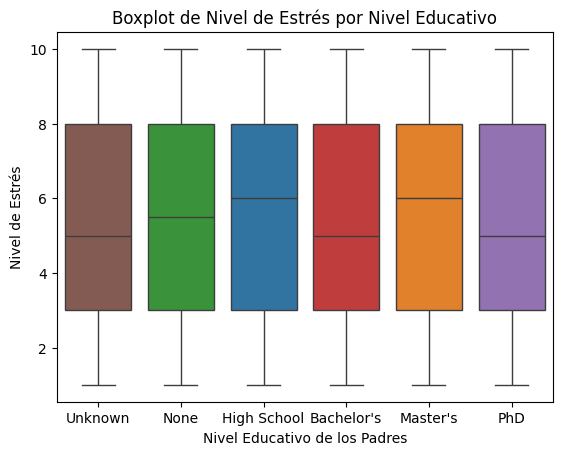

<Figure size 640x480 with 0 Axes>

In [23]:
orden = ['Unknown', 'None', 'High School', 'Bachelor\'s', 'Master\'s', 'PhD']

# Boxplot
sns.boxplot(x = parent_education, y = stress_level, order = orden, hue=parent_education)
plt.title("Boxplot de Nivel de Estr√©s por Nivel Educativo")
plt.xlabel("Nivel Educativo de los Padres")
plt.ylabel("Nivel de Estr√©s")

plt.show()
plt.clf()

Se mantiene la mediana entre 5 y 6 para todos los niveles educativos. Es decir, el nivel de estr√©s central no var√≠a mucho. No se evidencia un patr√≥n claro de que m√°s educaci√≥n parental signifique m√°s o menos estr√©s.

Todos los grupos tienen una distribuci√≥n similar, cubriendo casi todo el rango de 1 a 10. Las cajas tienen tama√±os similares, la variabilidad del estr√©s tambi√©n es parecida.

Los bigotes cubren casi el mismo rango en todos los niveles, lo cual indica consistencia en los extremos (m√≠nimos y m√°ximos).

---

F-statistic: 2.15213141296186
p-value: 0.11634387252012994


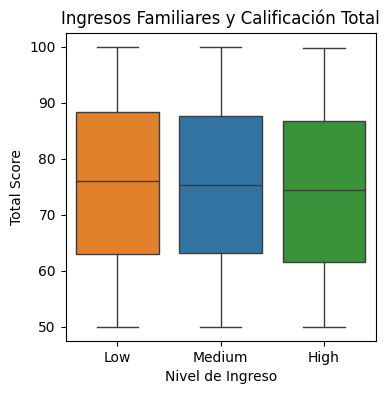

<Figure size 640x480 with 0 Axes>

In [36]:
# Dividir los datos en grupos
low = df[df['family_income'] == 'Low']['total_score']
medium = df[df['family_income'] == 'Medium']['total_score']
high = df[df['family_income'] == 'High']['total_score']

# ANOVA de una v√≠a
f_stat, p_value = stats.f_oneway(low, medium, high)

print("F-statistic:", f_stat)
print("p-value:", p_value)

orden = ['Low', 'Medium', 'High']

# Boxplot
plt.figure(figsize=(4,4))
sns.boxplot(x = family_income, y = total_score, order = orden, hue=family_income)
plt.title("Ingresos Familiares y Calificaci√≥n Total")
plt.xlabel("Nivel de Ingreso")
plt.ylabel("Total Score")

plt.show()
plt.clf()

Las calificaciones medianas est√°n cerca de 75 en los tres grupos. Es decir, en promedio, los estudiantes obtienen resultados similares sin importar el nivel de ingreso. Todos los grupos tienen un rango similar de calificaciones (entre 50 y 100). Las cajas y los bigotes son casi del mismo tama√±o, lo que indica que la dispersi√≥n de los datos es consistente entre los tres grupos. No hay outliers visibles, y los datos parecen sim√©tricos en general.

---

family_income
High      75.476028
Low       75.165947
Medium    75.677523
Name: attendance, dtype: float64


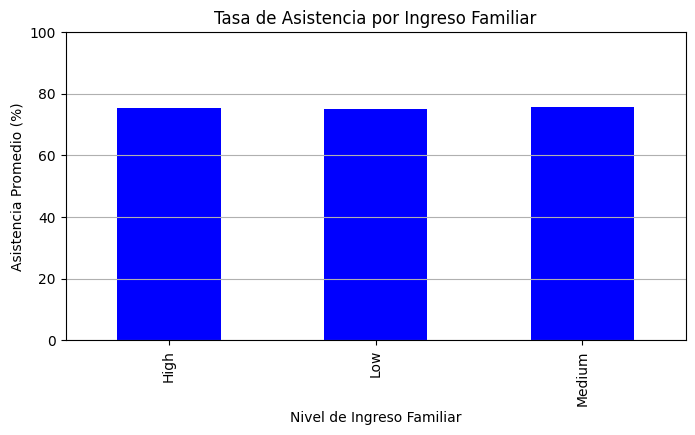

<Figure size 640x480 with 0 Axes>

In [25]:
# Se agrupa por el grupo familiar y se calcula la asistencia promedio
attendance_by_income = df.groupby('family_income', observed=True)['attendance'].mean().sort_index()
print(attendance_by_income)

# Gr√°fica de la asistencia promedio
plt.figure(figsize=(8,4))
attendance_by_income.plot(kind='bar', color='blue')
plt.title("Tasa de Asistencia por Ingreso Familiar")
plt.xlabel("Nivel de Ingreso Familiar")
plt.ylabel("Asistencia Promedio (%)")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()
plt.clf()

No hay una diferencia significativa en la asistencia promedio entre los distintos niveles de ingreso familiar. Todos rondan el 75%, lo que sugiere que el ingreso no parece ser un factor determinante en la asistencia escolar.

---

# üìå Conclusi√≥n

Los gr√°ficos indican que no hay una asociaci√≥n visual clara entre factores sociodemogr√°ficos (g√©nero, ingreso, educaci√≥n de los padres) y variables acad√©micas o personales (calificaciones, asistencia, estr√©s, sue√±o, estudio).

---